This is a notebook used to calculate and plot development lengths per ACI 318-19. See blog post on ACI 318 primer.

Assumptions:
* Clear spacing at least 2db, clear cover at least 1db
* Bottom bars without at least 12 in of fresh concrete placed below
* non-epoxy rebar
* normal weight concrete
* fy = 60 ksi
* hooks and headed bars are adequately confined/spaced (spacing greater than 6db). Wr = 1.0
* hooks and headed bars has enough side cover (side cover more than 6db). Wo = 1.0

In [1]:
# Imports
import numpy as np
import math
import matplotlib.pyplot as plt
import os

In [2]:
# CONSTANTS
FY = 60 #fy
WE = 1.0 #non-epoxy
LAMBDA = 1.0 #NWC
WR = 1.0 #adequately spaced/confined
WO = 1.25 #inadequate side cover

WT = 1.3 #top bars
WG = 1.0 #GR 60 bars

In [3]:
# Functions
def calc_WC(fpc):
    if fpc<6:
        wc = fpc*1000/15000 + 0.6
    else:
        wc = 1
    return wc

def calc_WS(d):
    if d>= 0.875:
        return 1.0
    else:
        return 0.8

def find_Ldt19(db,fpc):
    Ldt19=[]
    WC = calc_WC(fpc)
    for i in range(len(db)):
        ld = FY*1000*WE*WR*WO*WC/75/LAMBDA/math.sqrt(fpc*1000)*(db[i])**1.5
        ldmin = max(8*db[i],6)
        ld = max(ldmin,ld)
        Ldt19.append(ld)
    return Ldt19


def find_Ldh19(db,fpc):
    Ldh19=[]
    WC = calc_WC(fpc)
    for i in range(len(db)):
        ld = FY*1000*WE*WR*WO*WC/55/LAMBDA/math.sqrt(fpc*1000)*(db[i])**1.5
        ldmin = max(8*db[i],6)
        ld = max(ldmin,ld)
        Ldh19.append(ld)
    
    return Ldh19

def find_Ld19(db,fpc):
    ld19=[]
    for i in range(len(db)):
        WS = calc_WS(db[i])
        ld = max(FY*1000*WT*WE*WG*WS/20/LAMBDA/(1)/math.sqrt(fpc*1000)*db[i],12)
        ld19.append(ld)
    return ld19

In [4]:
# plotting data
def plot(db,data, title, ylabel):
    # initialize plot
    fig, axs = plt.subplots()
    fig.set_size_inches(16,9)
    
    # plot data
    axs.plot(db,data[0],label="f'c = 4 ksi",marker=".",c="forestgreen",markersize=6)
    axs.plot(db,data[1],label="f'c = 5 ksi",marker=".",c="chartreuse",markersize=6)
    axs.plot(db,data[2],label="f'c = 6 ksi",marker=".",c="gold",markersize=6)
    axs.plot(db,data[3],label="f'c = 7 ksi",marker=".",c="orange",markersize=6)
    axs.plot(db,data[4],label="f'c = 8 ksi",marker=".",c="red",markersize=6)
    
    # add grid
    axs.xaxis.grid()
    axs.yaxis.grid()

    # add ylabel
    axs.set_ylabel(ylabel, fontsize=14)
    axs.set_xlabel("Rebar Diameter", fontsize=14)
    axs.set_yticks(np.arange(0,max(data[0]),6))
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    # Add legend 
    axs.legend(loc="upper left")
    
    # set axis limit
    axs.set_xlim([db[0],db[-1]])
    
    # Set x-tick marks
    x_name = ["#3","#4","#5","#6","#7","#8","#9","#10","#11"]
    x_crit = db
    axs.set_xticks(x_crit)
    axs.set_xticklabels(x_name)

    # Add plot sub titles
    fig.suptitle(title,fontweight="bold")

In [5]:
ld_data=[]
ldh_data=[]
ldt_data=[]
FPC=[4.,5.,6.,7.,8.]
DB = [0.375,0.500,0.625,0.750,0.875,1.000,1.128,1.270,1.410] #bar sizes

for i in range(len(FPC)):
    ld_data.append(find_Ld19(DB,FPC[i]))
    ldh_data.append(find_Ldh19(DB,FPC[i]))
    ldt_data.append(find_Ldt19(DB,FPC[i]))

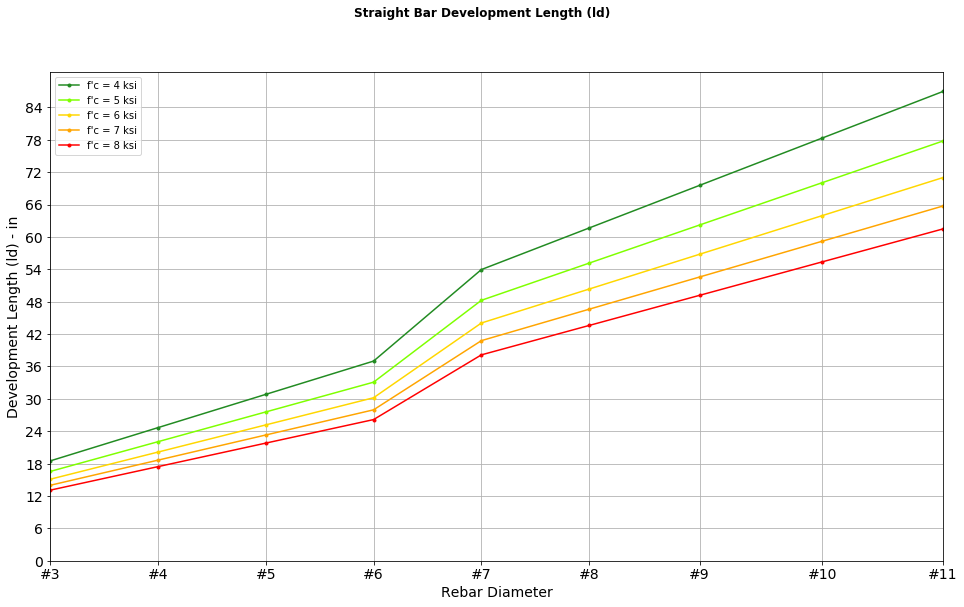

In [6]:
plot(DB,ld_data,"Straight Bar Development Length (ld)","Development Length (ld) - in")

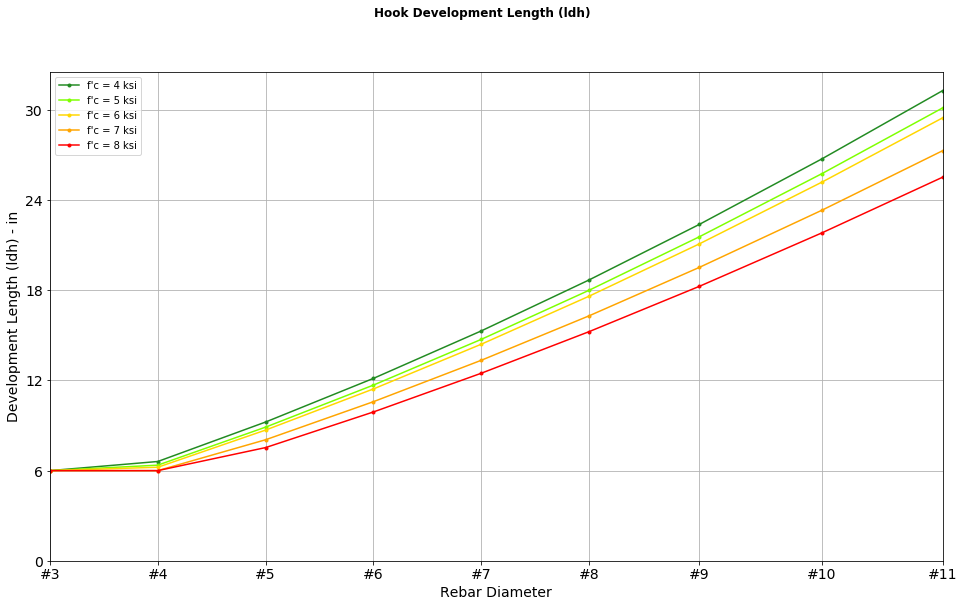

In [7]:
plot(DB,ldh_data,"Hook Development Length (ldh)","Development Length (ldh) - in")

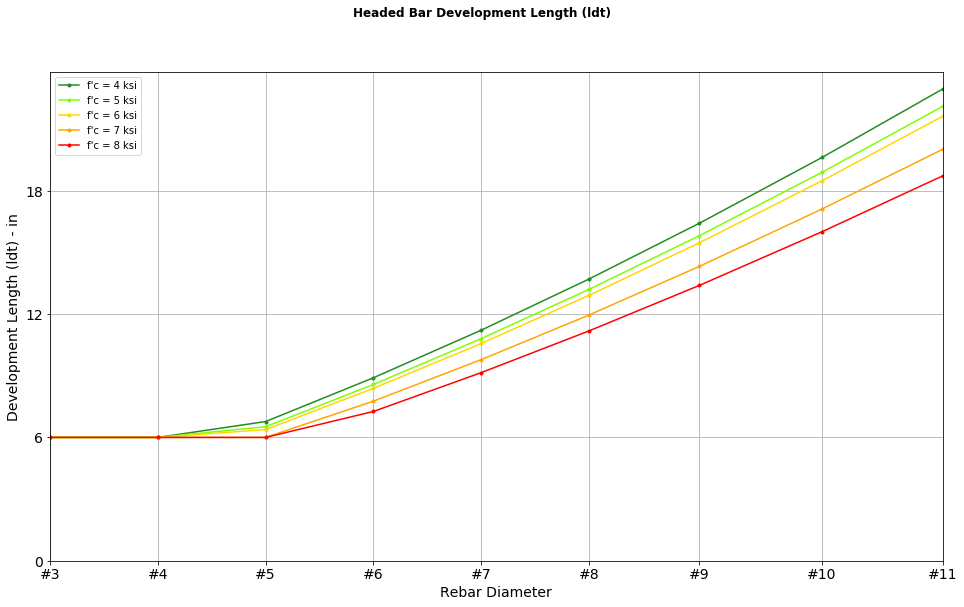

In [8]:
plot(DB,ldt_data,"Headed Bar Development Length (ldt)","Development Length (ldt) - in")